
# **IMPORTING LIBRARIES**

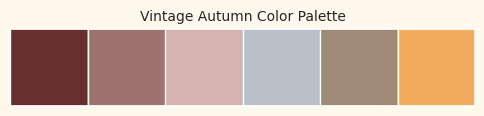

In [7]:
#Importing the Libraries
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import gdown
from IPython.display import display
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
np.random.seed(42)
# Set the face color
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
custom_palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

sns.palplot(custom_palette)
plt.title('Vintage Autumn Color Palette', fontsize=10)
plt.show()


# **LOADING DATA**


**Original Dataset**

| #  | Column               | Dtype   | Description                                                                |
|----|----------------------|---------|---------------------------------------------------------------------------|
| 0  | `ID`                 | int64   | Unique ID for each customer.                                             |
| 1  | `Year_Birth`         | int64   | Year of birth of the customer.                                          |
| 2  | `Education`          | object  | Customer's education level (e.g., Graduate, PhD, etc.).                |
| 3  | `Marital_Status`     | object  | Customer's marital status (e.g., Single, Married, Divorced, etc.).     |
| 4  | `Income`             | float64 | Customer's annual income. Some values may be missing (NaN).            |
| 5  | `Kidhome`            | int64   | Number of small children (under 12 years old) in the customer's home.   |
| 6  | `Teenhome`           | int64   | Number of teenagers (ages 12-18) in the customer's home.                |
| 7  | `Dt_Customer`        | object  | Date when the customer started registering. Format: date.               |
| 8  | `Recency`            | int64   | Number of days since the last interaction with the customer.            |
| 9  | `MntWines`           | int64   | Total money spent on wine products in the last two years.              |
| 10 | `MntFruits`          | int64   | Total money spent on fruit products in the last two years.             |
| 11 | `MntMeatProducts`    | int64   | Total money spent on meat products in the last two years.              |
| 12 | `MntFishProducts`    | int64   | Total money spent on fish products in the last two years.              |
| 13 | `MntSweetProducts`   | int64   | Total money spent on sweet products in the last two years.             |
| 14 | `MntGoldProds`       | int64   | Total money spent on gold products in the last two years.              |
| 15 | `NumDealsPurchases`  | int64   | Number of purchases made through discount offers.                      |
| 16 | `NumWebPurchases`    | int64   | Number of purchases made through the website.                           |
| 17 | `NumCatalogPurchases`| int64   | Number of purchases made through catalogs.                              |
| 18 | `NumStorePurchases`  | int64   | Number of purchases made in physical stores.                            |
| 19 | `NumWebVisitsMonth`  | int64   | Number of visits to the website in the last month.                     |
| 20 | `AcceptedCmp3`       | int64   | Did the customer accept the 3rd marketing campaign (0 = No, 1 = Yes)? |
| 21 | `AcceptedCmp4`       | int64   | Did the customer accept the 4th marketing campaign (0 = No, 1 = Yes)? |
| 22 | `AcceptedCmp5`       | int64   | Did the customer accept the 5th marketing campaign (0 = No, 1 = Yes)? |
| 23 | `AcceptedCmp1`       | int64   | Did the customer accept the 1st marketing campaign (0 = No, 1 = Yes)? |
| 24 | `AcceptedCmp2`       | int64   | Did the customer accept the 2nd marketing campaign (0 = No, 1 = Yes)? |
| 25 | `Complain`           | int64   | Has the customer ever filed a complaint (0 = No, 1 = Yes)?            |
| 26 | `Z_CostContact`      | int64   | Fixed cost for each contact (constant, always 3).                      |
| 27 | `Z_Revenue`          | int64   | Fixed revenue from each contact (constant, always 11).                 |
| 28 | `Response`           | int64   | Did the customer accept the last marketing campaign (0 = No, 1 = Yes)?|

In [ ]:
# Google Drive file ID
file_id = '1UNgzwVdR_eIrXg6zvJf1iuoEihohSQBi'
url = f'https://drive.google.com/uc?id={file_id}'

# File name after download
output = 'marketing_campaign.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1UNgzwVdR_eIrXg6zvJf1iuoEihohSQBi
To: /content/marketing_campaign.csv
100%|██████████| 220k/220k [00:00<00:00, 5.16MB/s]


'marketing_campaign.csv'

In [ ]:
pd.set_option('display.max_columns', None)
data = pd.read_csv(output, sep="\t")

print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i


- There are null values in the **Income** column.  
- The **Year_Birth** column should be an **object**, but it is left as an **integer** because it might be used to calculate age during the EDA phase.  
- The **Dt_Customer** column should have a **date** data type.  
- Some columns are categorical, such as **Education** and **Marital_Status**, which will be converted to integers during modeling.  
- Some columns with 2 values, namely `1 & 0`, such as **AcceptedCmp1**, **AcceptedCmp2**, **Response**, and **Complain**, are of **boolean** type, but are currently in **integer** form. This will be left as is since it does not interfere with the data exploration process (EDA) and facilitates the modeling process in the subsequent stages.


# **PRE-PROCESSING**


### **1. Removed Null Values**

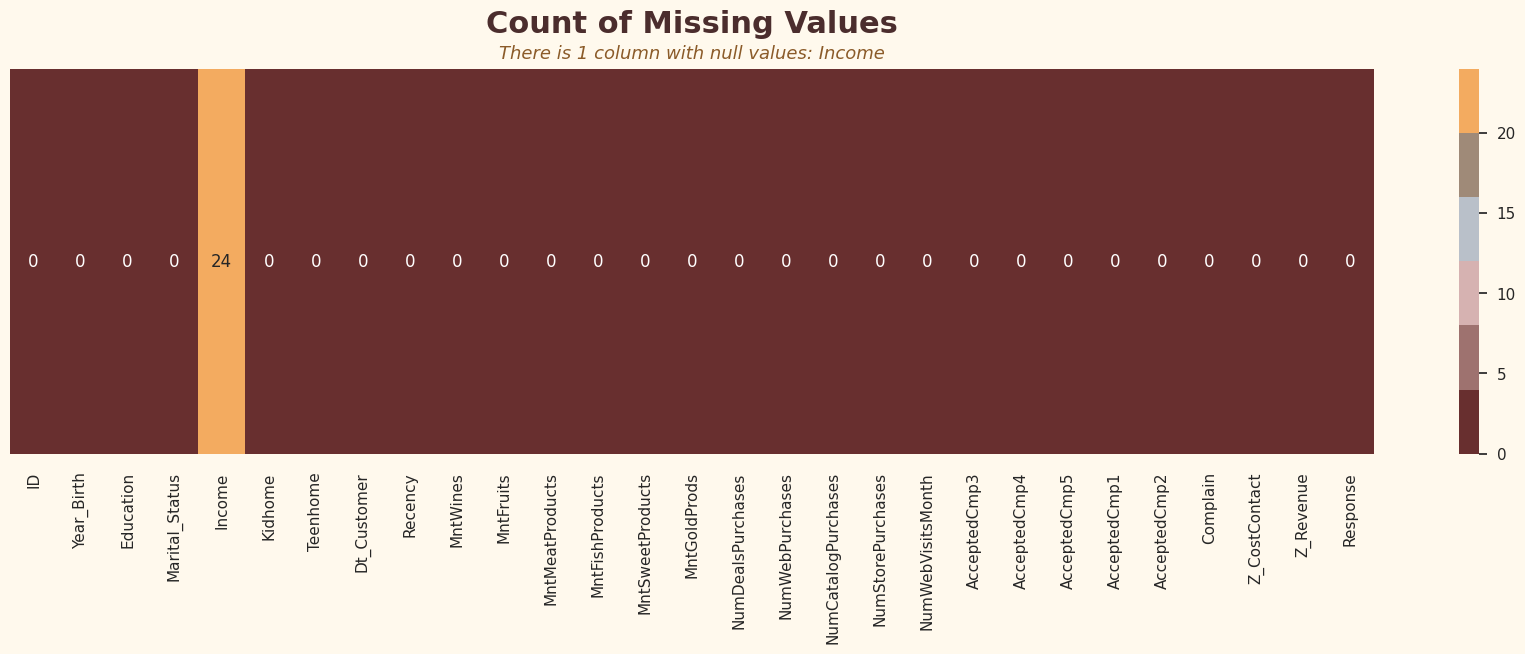

In [ ]:
# Set color preferences
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

plt.figure(figsize=(22, 5))

cmap = colors.ListedColormap(pallet)

# Create heatmap for missing values using the predefined color palette
sns.heatmap((data.isna().sum()).to_frame(name='').T, cmap=cmap, annot=True, fmt='0.0f')

plt.title('Count of Missing Values', fontsize=22, fontweight='bold', color="#4B2D2D", loc='center', pad=26)
plt.suptitle('There is 1 column with null values: Income', style='italic',
             va='center', fontsize=13, color="#8B5B29", x=0.435, y=0.91)
plt.show()


In [ ]:
# To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216



### **2. Removed Duplicate Values**

In [ ]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0



### **3. Change Column Name**

In [ ]:
# To clarify column names
data = data.rename(columns={
    "MntWines": "Wines",
    "MntFruits": "Fruits",
    "MntMeatProducts": "Meat",
    "MntFishProducts": "Fish",
    "MntSweetProducts": "Sweets",
    "MntGoldProds": "Gold"
})


### **4. Change Data Type Dt_Customer**

In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y") # Specify the correct format for day-month-year
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


Based on the analysis of the customer registration dates, the registration period lasted for nearly **2 years**, with the longest-registered customer on **January 8, 2012**, and the most recently registered customer on **December 6, 2014**. This indicates that the data covers a full two-year period of customer registrations.

### **5. Features Engineering**

Creating a feature **("Customer_For")** of the number of days the customers started to shop in the store relative to the last recorded date

In [ ]:
# Created a feature "Customer_For"
days = []
d1 = max(dates)  # Assuming it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = data["Customer_For"].dt.days

display(data[['Dt_Customer', 'Customer_For']].head())


Dt_Customer  Customer_For
0  2012-09-04           663
1  2014-03-08           113
2  2013-08-21           312
3  2014-02-10           139
4  2014-01-19           161

**Creation of the `Age` Column:**
We will create the **`Age`** column by considering the **`Recency`** column, which has a maximum value of 99 days. This indicates that the customer data is still relevant for age calculation. To calculate age, we will subtract the year in the **`Dt_Customer`** column from **`Year_Birth`**. Thus, the age of the customers will be calculated based on their most recent registration year, assuming that this segmentation project is conducted around the year 2015.

In [ ]:
max_recency = data['Recency'].max()
min_recency = data['Recency'].min()

print("Nilai maksimum dari kolom 'Recency':", max_recency)
print("Nilai minimum dari kolom 'Recency':", min_recency)

Nilai maksimum dari kolom 'Recency': 99
Nilai minimum dari kolom 'Recency': 0


In [ ]:
# Calculate the customer's age
current_year = max(d1.year for d1 in dates)  # Get the maximum year from 'Dt_Customer'
data['Age'] = current_year - data['Year_Birth']  # Calculate age based on 'Year_Birth'

display(data[['Year_Birth', 'Age']].head())

Year_Birth  Age
0        1957   57
1        1954   60
2        1965   49
3        1984   30
4        1981   33

Now we will be exploring the unique values in the categorical features to get a clear idea of the data.  

In [ ]:
display(data["Marital_Status"].value_counts())
display(data["Education"].value_counts())

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

* Create another feature **"Spent"** indicating the total amount spent by the customer in various categories over the span of two years.
* Create another feature **"Living_With"** out of **"Marital_Status"** to extract the living situation of couples.
* Create a feature **"Children"** to indicate total children in a household that is, kids and teenagers.
* To get further clarity of household, Creating feature indicating **"Family_Size"**
* Create a feature **"Is_Parent"** to indicate parenthood status
* Lastly, I will create three categories in the **"Education"** by simplifying its value counts.
* Dropping some of the redundant features

In [ ]:
# Total spendings on various items
data["Spent"] = data["Wines"] + data["Fruits"] + data["Meat"] + data["Fish"] + data["Sweets"] + data["Gold"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)


### **6. Data Statistic**

In [ ]:
# Group columns by type
categorical_columns = ['Education', 'Living_With']
boolean_columns = ['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2',
                   'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                   'Complain', 'Response', 'Is_Parent']
numerical_columns = ['Income', 'Recency', 'Wines', 'Fruits', 'Meat',
                     'Fish', 'Sweets', 'Gold', 'Customer_For', 'Age',
                     'Spent', 'Children', 'Family_Size']

In [ ]:
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

cmap = colors.ListedColormap(pallet)

# Describe numerical features with gradient background
numerical_description = data[numerical_columns].describe().T
styled_numerical_description = numerical_description.style.background_gradient(cmap=cmap, axis=1)

display(styled_numerical_description)

- **Income**: The average (mean) is around 52,247, but the maximum value reaches 666,666. This indicates the possibility of significant outliers at the upper end of the distribution.
  
- **Wines, Meat, Fish, Sweets, Gold**: All of these columns show that the maximum value is much higher than the third quartile (75%). For example, for `Wines`, the maximum value is 1,493, while the 75% (third quartile) is only 505. This could indicate the presence of outliers at high values.
  
- **Spent**: The maximum value is 2,525, while the third quartile is only 1,048. This also suggests the possibility of outliers.
  
- **Age**: The average is 45.18, with an age range from 18 to 121 years. An age of 121 years is very uncommon and may be considered an outlier.

- **Recency**: The average recency is 49, with a minimum value of 0 and a maximum of 99. An average close to the maximum limit could indicate that many customers have made recent purchases.

- **Children** and **Family_Size**: Both of these columns have low maximum values (3 for `Children` and 5 for `Family_Size`), indicating that most customers have small families. The average `Children` is 0.95, meaning many customers do not have children.

- Note that the average values that are significantly higher than the median (50%) in many features suggest a skewed distribution and the potential presence of outliers.

In [ ]:
categorical_description = data[categorical_columns].describe().T
display(categorical_description)

count unique       top  freq
Education    2240      3  Graduate  1127
Living_With  2240      2   Partner  1444

Most customers in this dataset are graduates and live with partners, which can provide insights into the target demographics.

## **7. Numeric Columns Data Distribution**

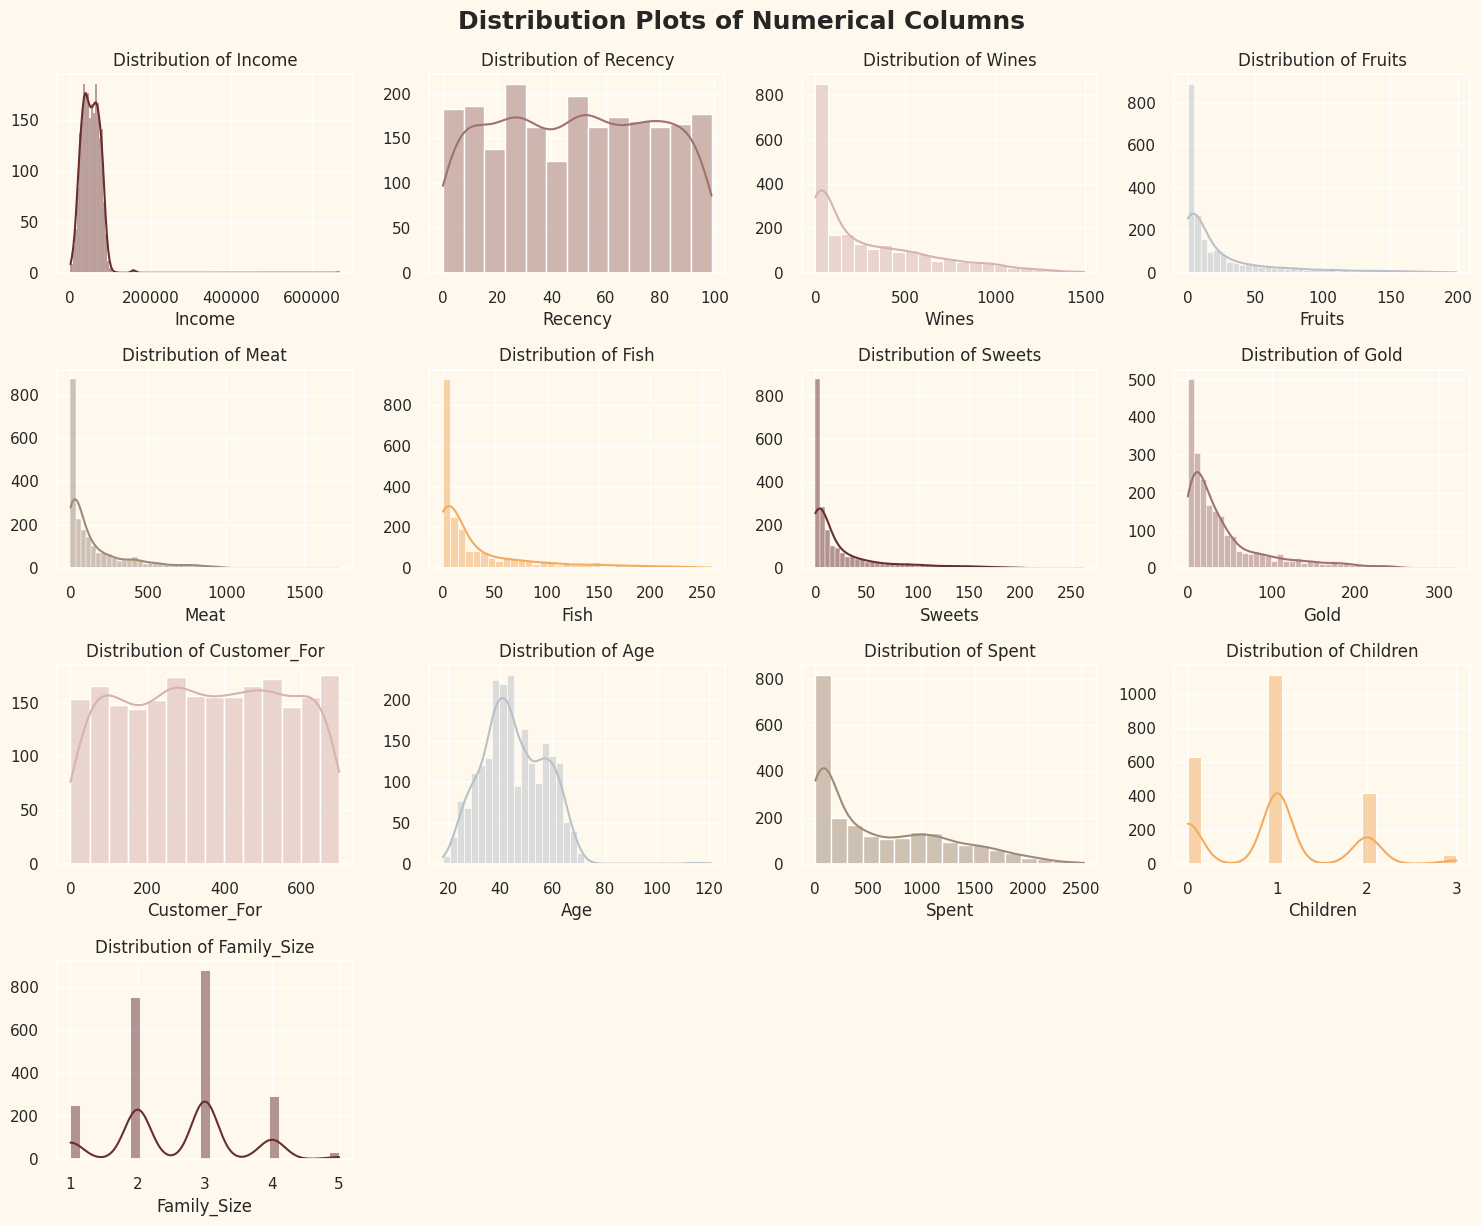

In [ ]:
# Set color preferences
sns.set(rc={"axes.facecolor":"#FFF9ED", "figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

To_Plot = numerical_columns

# Create distplot (with KDE) for each numerical column
plt.figure(figsize=(15, 12))
for i, col in enumerate(To_Plot):
    plt.subplot(4, 4, i + 1)  # Create grid subplot
    sns.histplot(data[col], kde=True, color=pallet[i % len(pallet)])
    plt.title(f"Distribution of {col}")
    plt.ylabel('')

plt.tight_layout()
plt.suptitle("Distribution Plots of Numerical Columns", y=1.02, fontsize=18, fontweight='bold')
plt.show()


Clearly, there are a few outliers in the Income and Age features.
I will be deleting the outliers in the data.

## **8. Removed Outliers**

In [ ]:
# Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


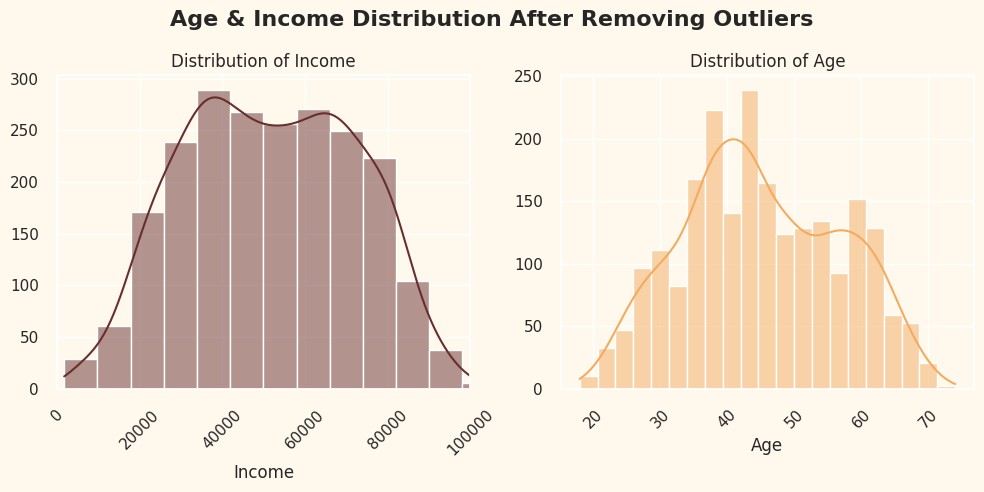

In [ ]:
# Set the color palette and background color
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
pallet = ["#682F2F", "#F3AB60"]

selected_columns = ["Income", "Age"]

# Create the distribution plot (with KDE) for 'Income' and 'Age'
plt.figure(figsize=(10, 5))
for i, col in enumerate(selected_columns):
    plt.subplot(1, 2, i + 1)
    if col == "Income":
        sns.histplot(data[col], kde=True, color=pallet[i % len(pallet)], bins=20)
        plt.xlim(0, 100000)
    else:
        sns.histplot(data[col], kde=True, color=pallet[i % len(pallet)])
    plt.title(f"Distribution of {col}")
    plt.ylabel('')
    plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.suptitle("Age & Income Distribution After Removing Outliers", fontsize=16, fontweight='bold')
# Adjust the spacing between the suptitle and the plots
plt.subplots_adjust(top=0.85)
plt.show()


After removing the outliers, the data appears more balanced, with a distribution that better represents the central tendencies of Income and Age, reducing the extreme skew previously observed.


## **9. Correlation**

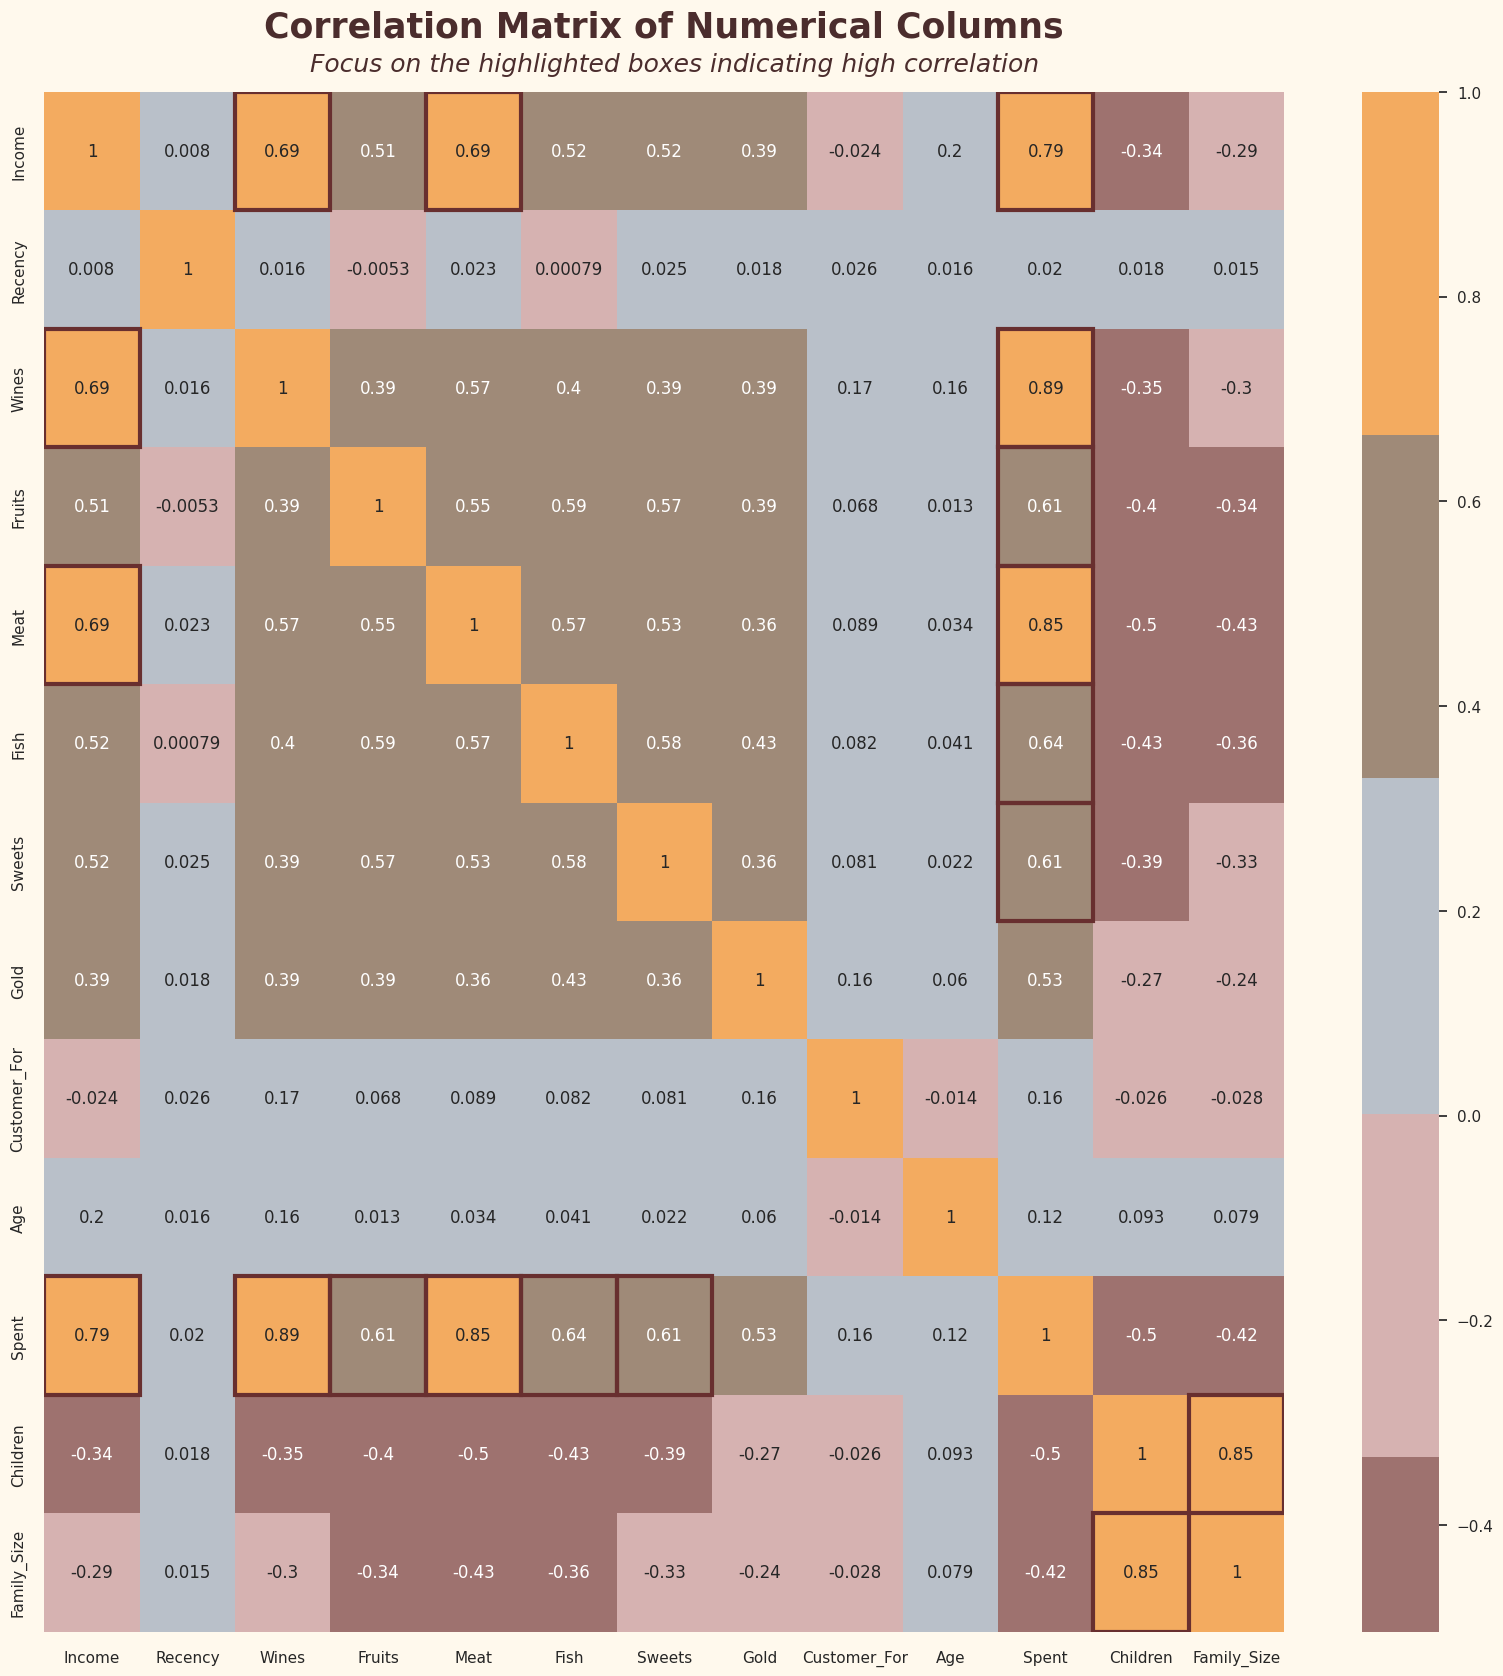

In [ ]:
# Set color preferences
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(pallet)

corrmat = data[numerical_columns].corr()

# Create heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)

plt.title("Correlation Matrix of Numerical Columns", fontsize=25, fontweight='bold', color="#4B2D2D", pad=40)
plt.suptitle("Focus on the highlighted boxes indicating high correlation", fontsize=18, fontweight='light', color="#4B2D2D", style='italic', x=0.44, y=0.90)

for i in range(len(corrmat.columns)):
    for j in range(len(corrmat.columns)):
        if abs(corrmat.iloc[i, j]) > 0.6 and i != j:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor=pallet[0], lw=3))  # Using the first color from the palette

plt.show()


- Total spending (**Spent**) has a strong correlation with various spending categories such as **Wines**, **Meat**, **Fish**, **Sweets**, and **Fruits**. This indicates that changes in the purchase of these items significantly impact the total spending of customers.  
- The relationship between **Income** and several spending categories (**Wines**, **Meat**) as well as total spending (**Spent**) shows that income greatly influences customer spending.  
- **Children** and **Family_Size** also have a very strong correlation, reflecting a logical relationship between the number of children and family size.


## **10. Label Encoder**

The use of label encoding for categorical features in this situation can be considered appropriate, especially based on the following reasons:

1. **Limited Number of Categories**: For the feature **Living_With**, which only has two categories (e.g., "Partner" and "Others"), label encoding is very suitable. This is because the model will understand the relationship between the categories in a more structured way, without adding unnecessary complexity.

2. **Hierarchical Relationships**: In some cases, label encoding can provide more information about relationships between categories. However, in this case, since there are only two categories, hierarchical relationships are not a major issue.

3. **Space and Time Efficiency**: By using label encoding, we avoid the dimensionality increase that can occur with one-hot encoding, which can speed up the model training process and reduce memory usage.

4. **Presence of High-Frequency Categories**: For the feature **Education**, where the "Graduate" category has the highest frequency, label encoding will not disrupt the analysis, as the model can still leverage frequency information to distinguish between categories effectively.

However, it is essential to always consider the context and the model being used, as in some cases, one-hot encoding may be preferred if there are more categories or if there is a risk that the model may misinterpret the relationships between ordinal categories.

In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in categorical_columns:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical



## **11.Remove Column & Standardization**

The removal of columns such as **AcceptedCmp1**, **AcceptedCmp2**, **AcceptedCmp3**, **AcceptedCmp4**, **AcceptedCmp5**, **Complain**, and **Response** in this analysis is based on several important reasons. These columns are considered redundant and not relevant to the current analysis. Since these features do not provide significant contributions to understanding the business problems being faced, their removal simplifies the model.

By reducing the number of features, we prevent overfitting and enhance the interpretability of the model. A model with too many features becomes complex and difficult to interpret, thereby reducing the effectiveness of analysis and decision-making. Therefore, the removal of these columns aims to focus on more relevant and valuable features, which in turn helps achieve better and clearer results in data analysis.

Moreover, even though these columns are removed from the dataset used for analysis and modeling, **the original data remains available and can be re-evaluated if necessary after modeling**. This step ensures that we can still perform Exploratory Data Analysis (EDA) and further evaluation on the removed features if further relevance or utility is discovered. In this way, we can simplify the initial analysis and model while still having the flexibility to assess the removed features whenever needed.

In [ ]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
pd.set_option('display.max_columns', None)
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
0  1.690293  2.453472  1.483713  0.852576           0.351030         1.426865   
1 -0.718230 -0.651004 -0.634019 -0.733642          -0.168701        -1.126420   
2 -0.178542  1.339513 -0.147184 -0.037254          -0.688432         1.426865   
3 -0.655787 -0.504911 -0.585335 -0.752987          -0.168701        -0.761665   
4 -0.218684  0.152508 -0.001133 -0.559545           1.390492         0.332600   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Customer_For  \
0             2.503607          -0.555814           0.692181      1.527721   
1            -0.571340          -1.171160          -0.132545     -1.189011   
2            -0.229679           1.290224          -0.544908     -0.206048   
3            -0.913000          -0.555814           0.279818     -1.060584   
4             0.111982           0.059532          -0.132545     -0.951915   

        Age     Spent  Living_With  Children  Family_Size  Is_Parent  
0  1.018352  1.676245    -1.349603 -1.264598    -1.758359  -1.581139  
1  1.274785 -0.963297    -1.349603  1.404572     0.449070   0.632456  
2  0.334530  0.280110     0.740959 -1.264598    -0.654644  -1.581139  
3 -1.289547 -0.920135     0.740959  0.069987     0.449070   0.632456  
4 -1.033114 -0.307562     0.740959  0.069987     0.449070   0.632456


## **12. Dimensionality Reduction**

After checking the correlation between features, several features exhibit high correlation, which can lead to redundancy and impact model performance. To address this, **Principal Component Analysis (PCA)** is used to reduce data dimensionality. PCA works by transforming correlated features into a smaller number of uncorrelated components, making the analysis more efficient.

However, PCA also has drawbacks, as the results are more difficult to interpret. Since PCA components are not the original features, explaining what happens within the model becomes challenging, especially when communicating to stakeholders. The solution is to use PCA for modeling, but during evaluation or further analysis, we can re-integrate the components with the original data that has been prepared in advance. This allows us to analyze the original variables more easily, especially to understand data behavior, such as in cluster analysis.

The selection of **3 PCA components** is based on the consideration that this number is sufficient to retain most of the important information from the dataset while remaining simple enough for processing in the model.

In [ ]:
# Initialize PCA to reduce dimensions or features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=["col1", "col2", "col3"])
PCA_description = PCA_ds.describe().T

pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(pallet)

styled_PCA_description = PCA_description.style.background_gradient(cmap=cmap, axis=1)  # Set gradient background
display(styled_PCA_description)


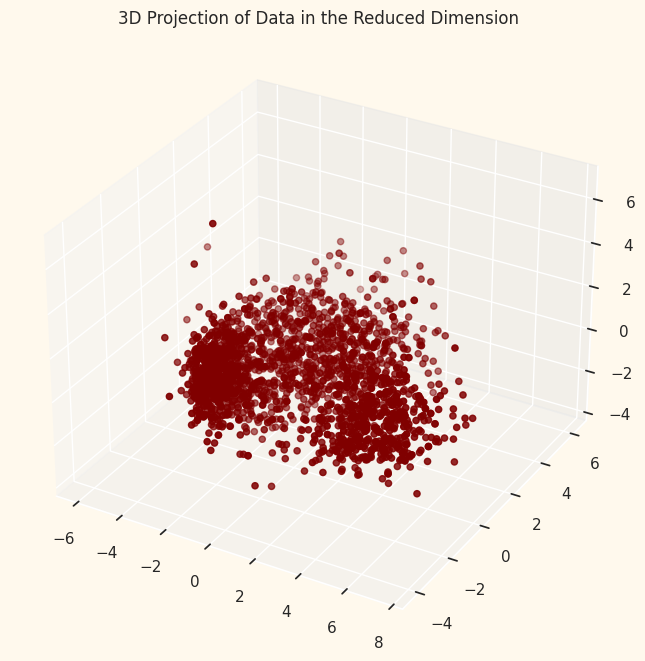

In [ ]:
# Define the components from PCA
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

# Create a 3D plot
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("3D Projection of Data in the Reduced Dimension")

plt.show()



# **CLUSTERING MODELLING**



**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


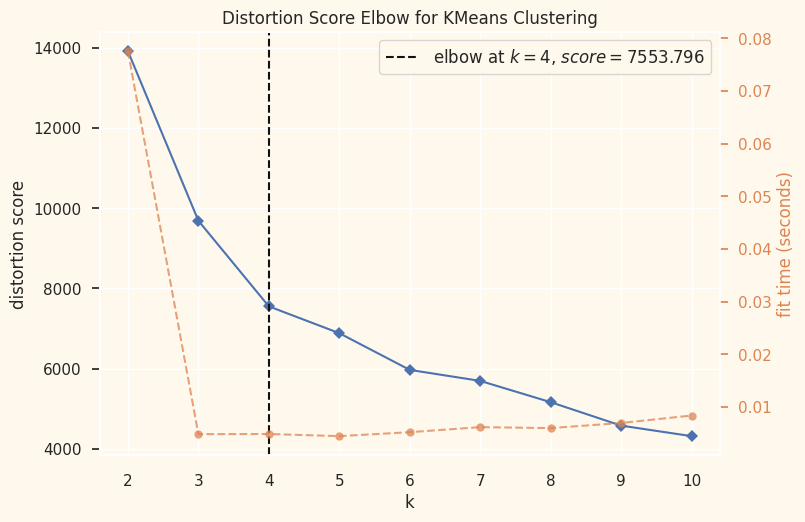

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data.
Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

## **1. The Plot Of The Clusters**

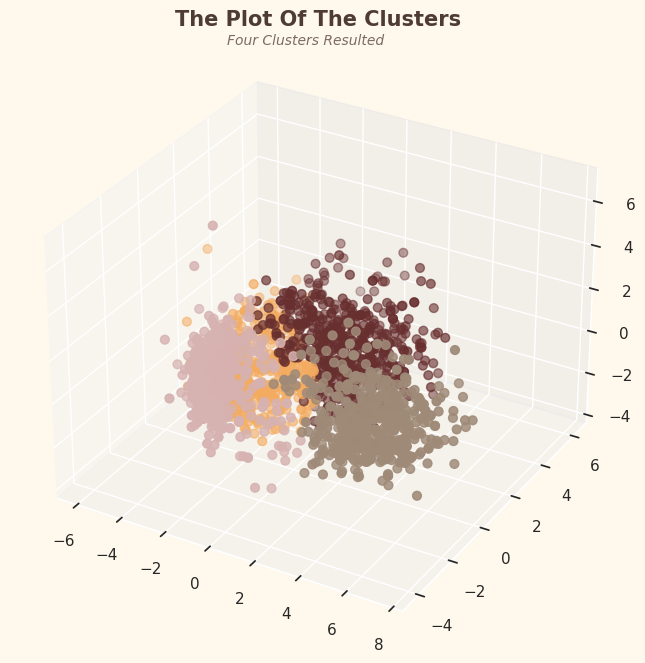

In [ ]:
# Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters", fontsize=15, fontweight='bold', color='#4E3B31')
plt.suptitle("Four Clusters Resulted", fontsize=10, style='italic', y=0.88, color='#7D6B62')
plt.show()



# **EVALUATING MODELS & EDA**



Since this is unsupervised clustering, we do not have labeled features to evaluate or score our model. In unsupervised clustering, we do not know which groups are correct or incorrect, so we cannot use evaluation metrics commonly used in supervised learning.

The goal of this section is to study the patterns present in the formed clusters and determine the nature of those patterns. This means we will look at the characteristics of each cluster to understand what distinguishes them.

To do this, we will analyze the data by paying attention to the clusters formed through exploratory data analysis (EDA) and draw conclusions. This indicates that we will use EDA techniques to explore and understand the data based on the generated clusters.

## **1. Distribution Of The Clusters**

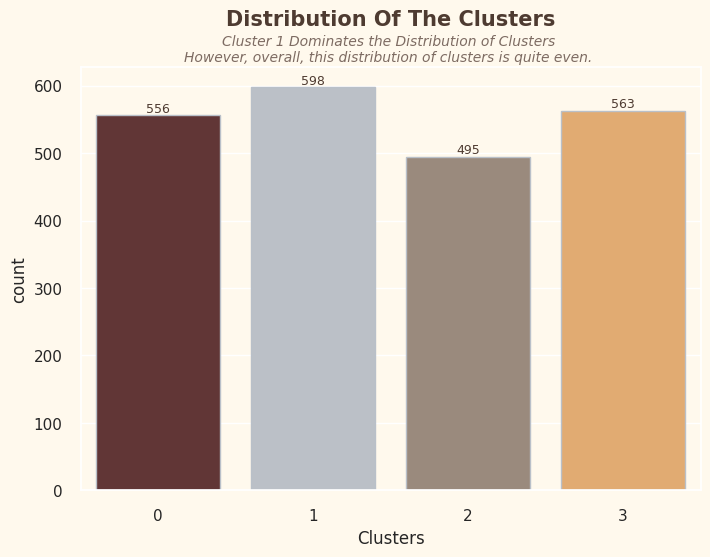

In [ ]:
# Set color palette
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]

# Create countplot
pl = sns.countplot(x=data["Clusters"], palette=pal, edgecolor=pal[1])
pl.set_title("Distribution Of The Clusters", fontsize=15, fontweight='bold', color='#4E3B31', pad=30)

plt.suptitle("Cluster 1 Dominates the Distribution of Clusters\n"
             "However, overall, this distribution of clusters is quite even.",
             fontsize=10, color='#7D6B62', style='italic', x=0.51, y=0.94)

for p in pl.patches:
    pl.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom',
                 color='#4E3B31', fontsize=9)

plt.show()


## **2. Cluster's Profile Based on Income and Spending**

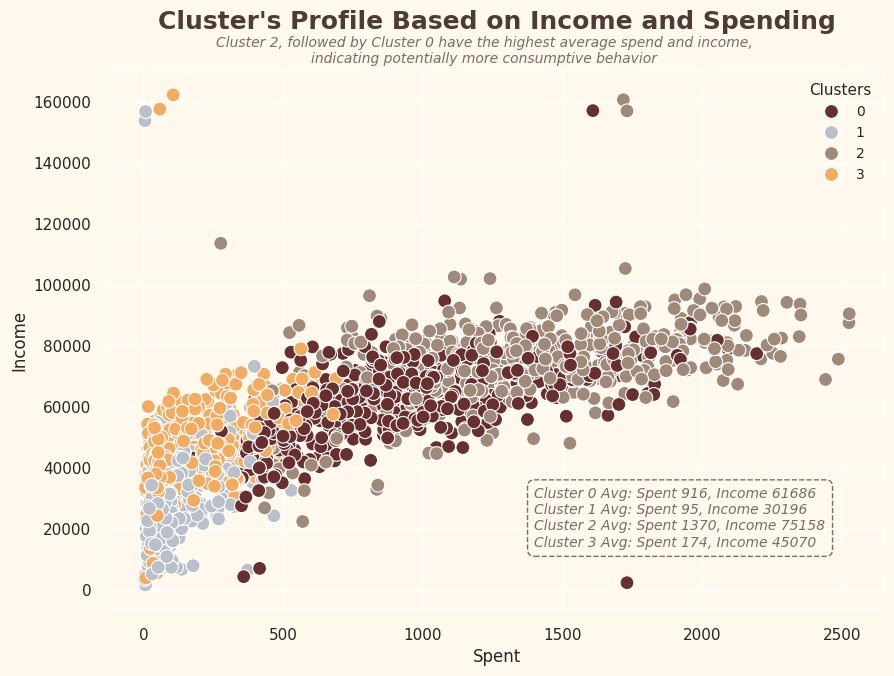

In [41]:
# Set color palette
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]

# Calculate average income and spent for each cluster
mean_values = data.groupby('Clusters').mean()[['Spent', 'Income']]

# Create scatterplot
plt.figure(figsize=(10, 7))
pl = sns.scatterplot(data=data, x='Spent', y='Income', hue='Clusters', palette=pal, s=100)

# Add text box with average information for each cluster
plt.text(0.55, 0.20,
         f"Cluster 0 Avg: Spent {int(mean_values.loc[0, 'Spent'])}, Income {int(mean_values.loc[0, 'Income'])}\n"
         f"Cluster 1 Avg: Spent {int(mean_values.loc[1, 'Spent'])}, Income {int(mean_values.loc[1, 'Income'])}\n"
         f"Cluster 2 Avg: Spent {int(mean_values.loc[2, 'Spent'])}, Income {int(mean_values.loc[2, 'Income'])}\n"
         f"Cluster 3 Avg: Spent {int(mean_values.loc[3, 'Spent'])}, Income {int(mean_values.loc[3, 'Income'])}",
         fontsize=10, style='italic', color='#7D6B62',
         bbox=dict(facecolor='none', edgecolor='#7D6B62', boxstyle='round,pad=0.5', linestyle='--'),
         transform=plt.gcf().transFigure)

# Add title and suptitle (leave as is)
pl.set_title("Cluster's Profile Based on Income and Spending", fontsize=18, fontweight='bold', color='#4E3B31', pad=30)
plt.suptitle("Cluster 2, followed by Cluster 0 have the highest average spend and income,\nindicating potentially more consumptive behavior",
             fontsize=10, style='italic', color='#7D6B62', y=0.93)

# Set legend and show plot
plt.legend(title='Clusters', title_fontsize='11', fontsize='10', loc='upper right')
plt.show()


The conclusion of this analysis shows that Category 2 and Category 0 have higher average spending, while Category 1 and Category 3 show lower spending. This indicates the need for different marketing strategies to enhance engagement and spending from each customer category.

## **3.Spending Distribution Across Clusters**

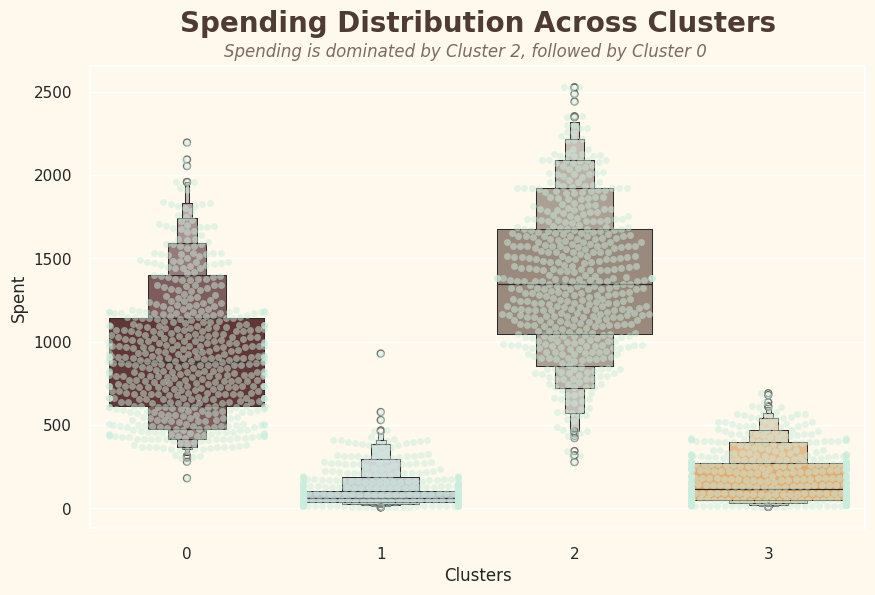

In [ ]:
# Set color palette
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
plt.figure(figsize=(10, 6))

# Create swarmplot and boxenplot
pl = sns.swarmplot(x=data["Clusters"], y=data["Spent"], color="#CBEDDD", alpha=0.5)
pl = sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)

pl.set_title("Spending Distribution Across Clusters", fontsize=20, fontweight='bold', color='#4E3B31', pad=25)
plt.suptitle("Spending is dominated by Cluster 2, followed by Cluster 0", fontsize=12, color='#7D6B62', style='italic', y=0.92)
plt.show()


## **4. Count of Promotion Accepted**

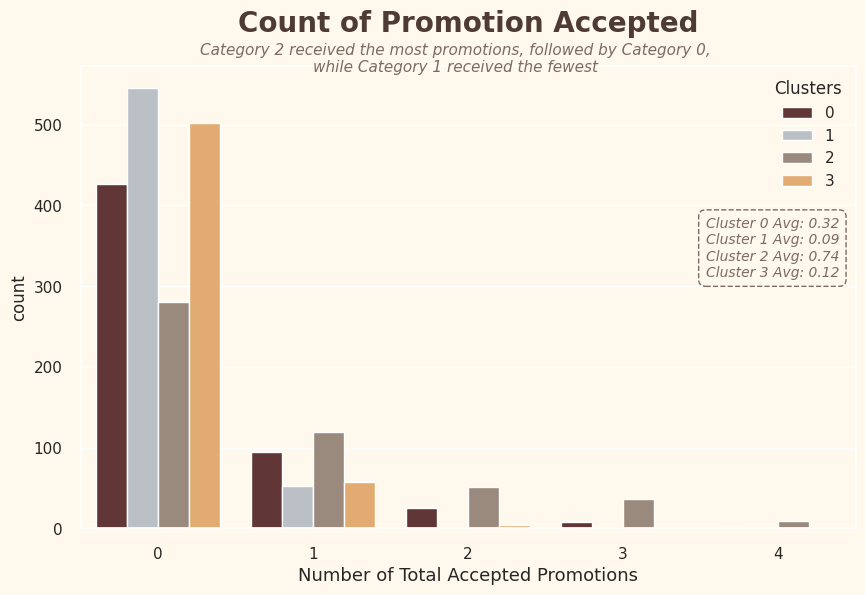

In [49]:
# Create a feature for the total number of promotions accepted
data["Total_Promos"] = (data["AcceptedCmp1"] + data["AcceptedCmp2"] +
                        data["AcceptedCmp3"] + data["AcceptedCmp4"] +
                        data["AcceptedCmp5"])

plt.figure(figsize=(10, 6))
# Create countplot for the number of promotions accepted
pl = sns.countplot(x=data["Total_Promos"], hue=data["Clusters"], palette=pal)

pl.set_title("Count of Promotion Accepted", fontsize=20, fontweight='bold', color='#4E3B31', pad=25)
plt.suptitle("Category 2 received the most promotions, followed by Category 0,\nwhile Category 1 received the fewest",
             fontsize=11, color='#7D6B62', style='italic', y=0.92)

# # Create countplot for the number of promotions accepted
mean_values = data.groupby('Clusters')['Total_Promos'].mean().reset_index()
plt.text(0.75, 0.53,
         f"Cluster 0 Avg: {mean_values.loc[0, 'Total_Promos']:.2f}\n"
         f"Cluster 1 Avg: {mean_values.loc[1, 'Total_Promos']:.2f}\n"
         f"Cluster 2 Avg: {mean_values.loc[2, 'Total_Promos']:.2f}\n"
         f"Cluster 3 Avg: {mean_values.loc[3, 'Total_Promos']:.2f}",
         fontsize=10, style='italic', color='#7D6B62',
         bbox=dict(facecolor='none', edgecolor='#7D6B62', boxstyle='round,pad=0.5', linestyle='--'),
         transform=plt.gcf().transFigure)

pl.set_xlabel("Number of Total Accepted Promotions", fontsize=13)
plt.show()


Category 0 and Category 2 show higher participation rates in promotions, with averages of 0.32 and 0.74, respectively, while Category 1 and Category 3 tend to have lower participation rates, with averages of 0.09 and 0.12. Mentioning this indicates that Category 0 and Category 2 likely have a greater interest in promotions, whereas Category 1 and Category 3 may require additional marketing strategies to increase their participation.

## **5. Number of Deals Purchased**

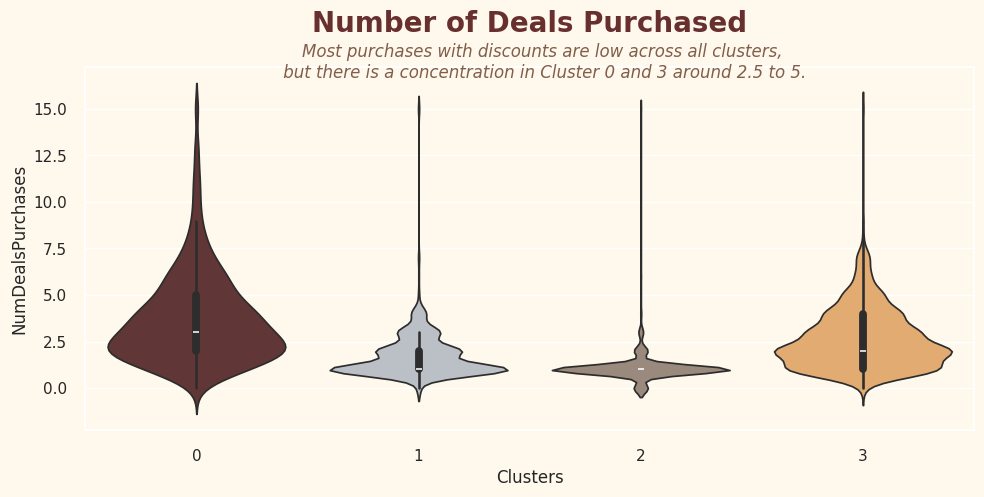

In [57]:
plt.figure(figsize=(10, 6))

# Create a violin plot for the number of deals purchased based on cluster
pl = sns.violinplot(y=data["NumDealsPurchases"], x=data["Clusters"], palette=pal)
pl.set_title("Number of Deals Purchased", fontsize=20, fontweight='bold', color="#682F2F", pad=25)
plt.suptitle("Most purchases with discounts are low across all clusters,\n but there is a concentration in Cluster 0 and 3 around 2.5 to 5.",
             fontsize=12, color="#815E49", style='italic', x=0.55, y=0.77)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Purchasing Deals occurs most frequently in cluster 0 and cluster 3, while cluster 1 shows a lower participation rate in these offers. Cluster 2 does not show a significant preference for the provided offers.

## **6. NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth Density**

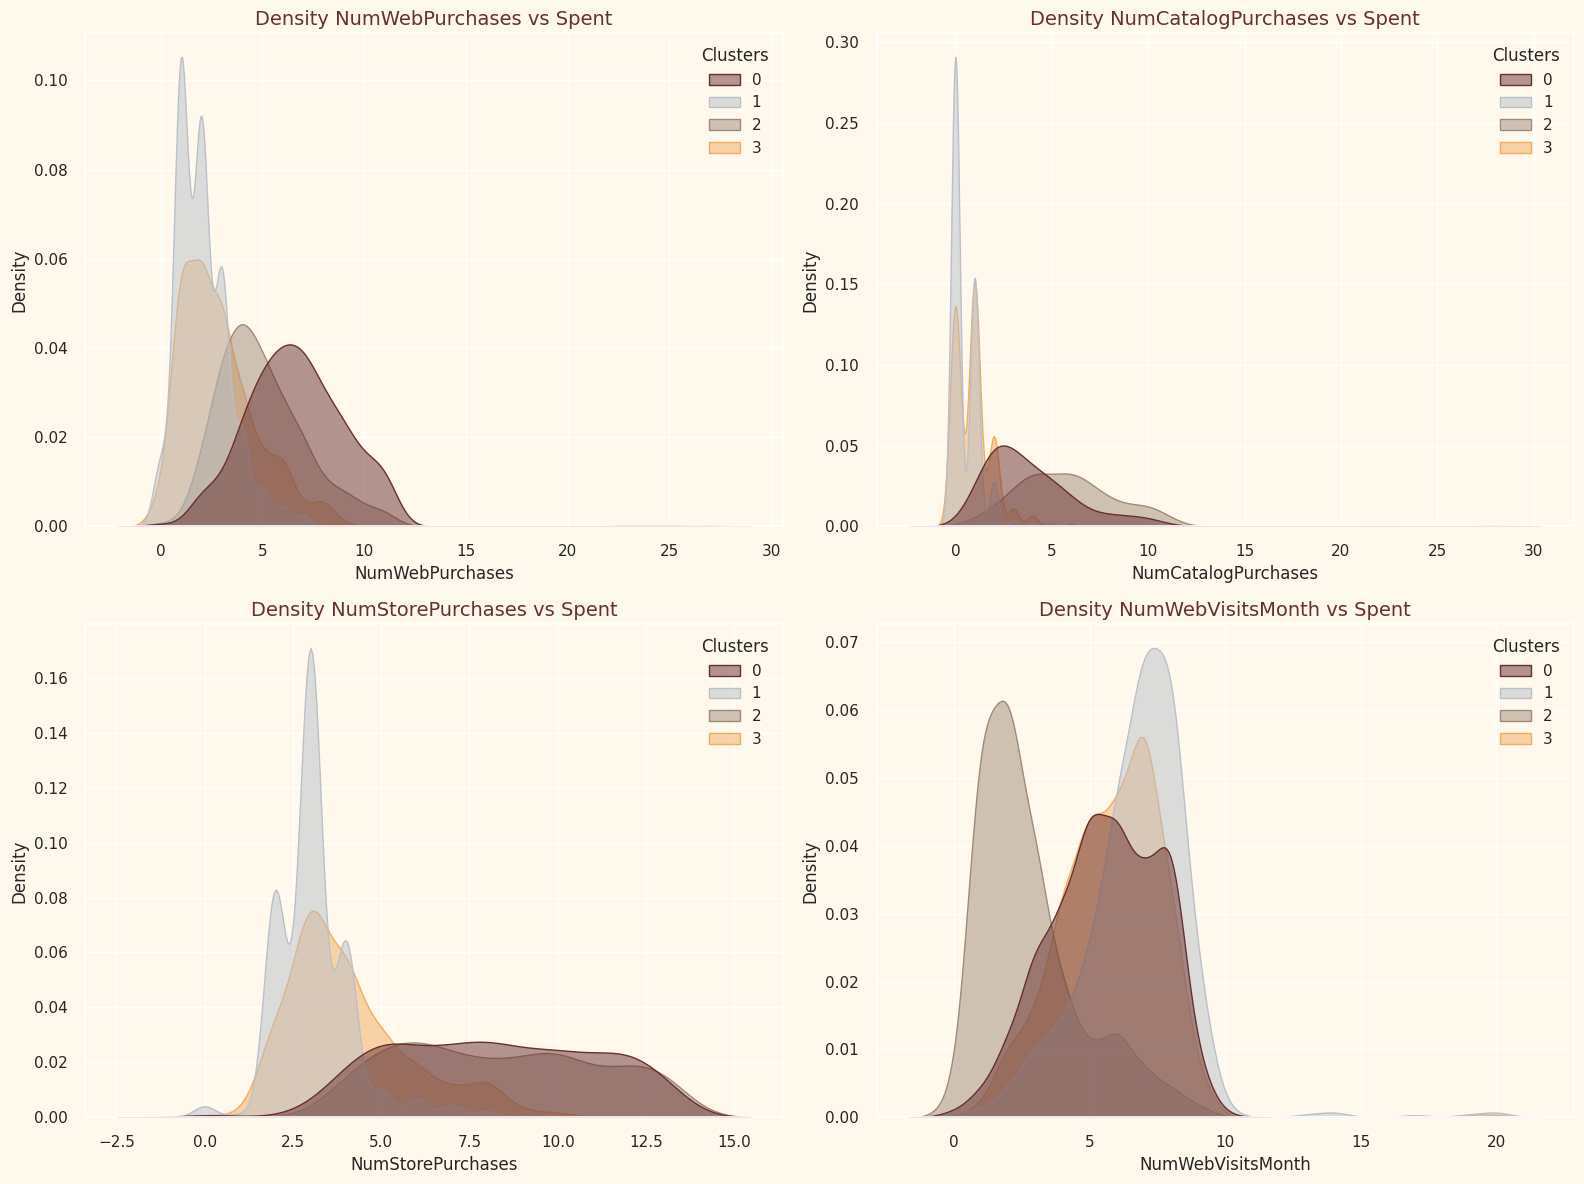

In [56]:
Places = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]
plt.figure(figsize=(16, 12))

# Loop to create a KDE plot for each variable in Places
for idx, i in enumerate(Places, 1):
    plt.subplot(2, 2, idx)  # 2x2 grid for subplots
    sns.kdeplot(data=data, x=i, hue="Clusters", palette=pal, fill=True, alpha=0.5)

    plt.title(f"Density {i} vs Spent", fontsize=14, color="#682F2F")
    plt.xlabel(i)
    plt.ylabel("Density")
plt.tight_layout()
plt.show()



1. **Online Purchases:**
   Categories 0 and 2 are more active in making online purchases, possibly due to better accessibility or more attractive offers. Meanwhile, Categories 1 and 3 need to identify strategies to enhance the user experience and encourage more purchases through their web platform.

2. **Catalog Purchases:**
   Category 2 is more active in making purchases from catalogs, possibly due to more appealing products or better accessibility to product information. Category 0 also shows significant interest, while Categories 1 and 3 need more effective strategies to boost catalog purchases.

3. **In-Store Purchases:**
   Categories 2 and 0 are more active in making purchases at physical stores, reflecting a preference for the in-store shopping experience. Categories 3 and 1 need better strategies to attract consumers to make purchases in stores.

4. **Monthly Website Visits:**
   Categories 1 and 3 are more active in visiting the website, possibly due to a higher interest in online offers. Category 0 also shows a good level of visits, while Category 2 needs more engaging marketing strategies to increase website engagement.

Each category can enhance their marketing strategies based on these findings to better attract and meet consumer needs across various purchasing platforms.

## **7. Kidhome, Teenhome, Customer_For, Age, Children, Family_Size, Is_Parent, Education, Living_With Distributions**

Now that we have formed clusters and observed their purchasing habits, let’s take a look at who is in these clusters. To do this, we will create profiles of the formed clusters and draw conclusions about who our star customers are and who needs more attention from the retail store marketing team. To determine this, I will create plots of several features that show the personal characteristics of customers based on their clusters.

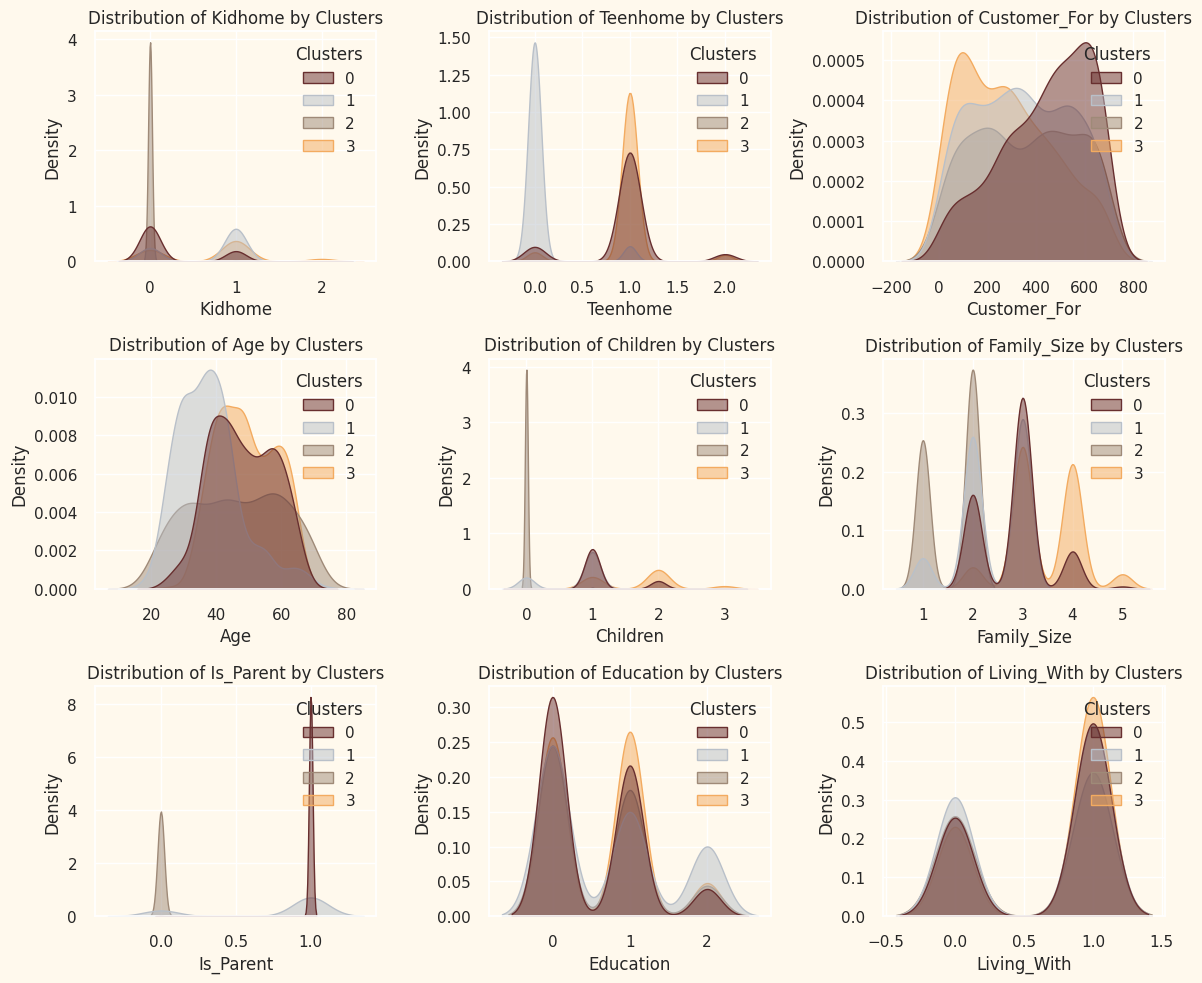

In [ ]:
# Define the personal attributes to plot
Personal = ["Kidhome", "Teenhome", "Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education", "Living_With"]

plt.figure(figsize=(12, 10))

# Loop to create a KDE plot for each feature in Personal
for i, feature in enumerate(Personal):
    # Create subplot with 3 rows
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns, plot i-th

    sns.kdeplot(data=data, x=feature, hue=data["Clusters"], palette=pal, fill=True, alpha=0.5)
    plt.title(f'Distribution of {feature} by Clusters')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


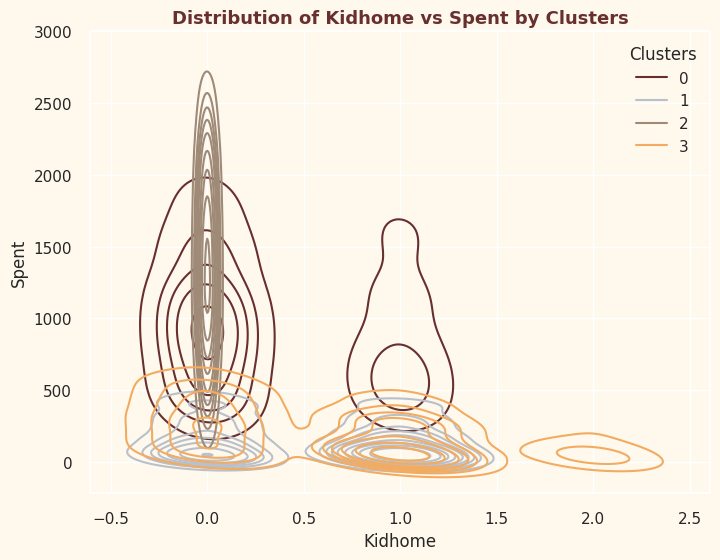

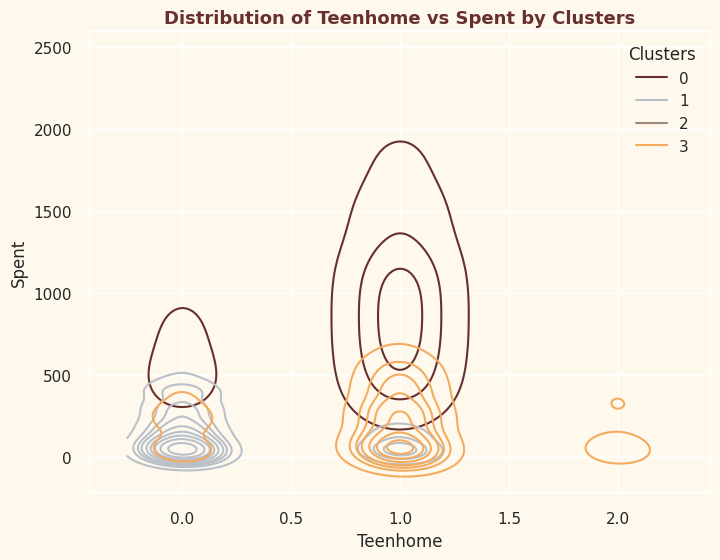

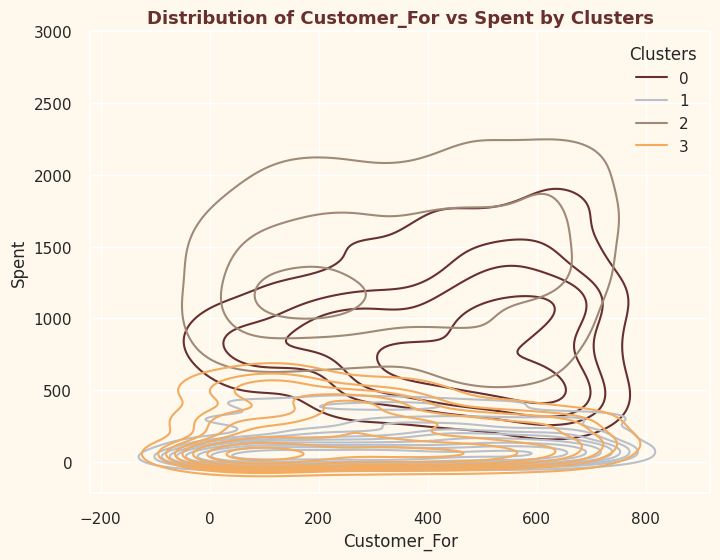

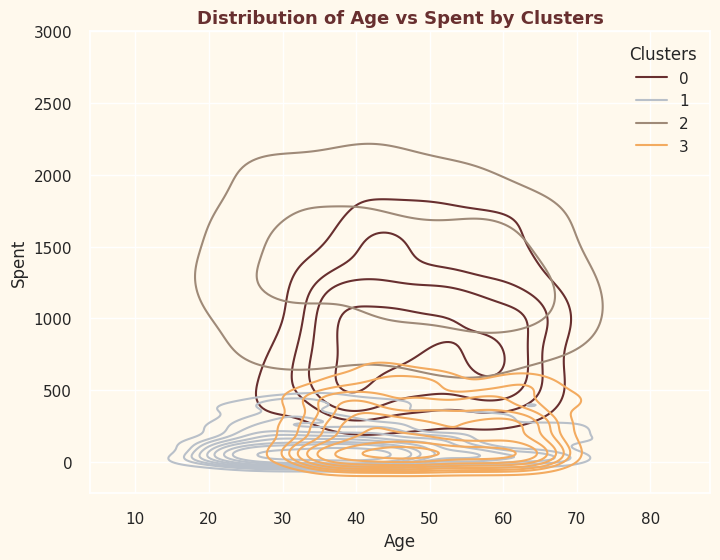

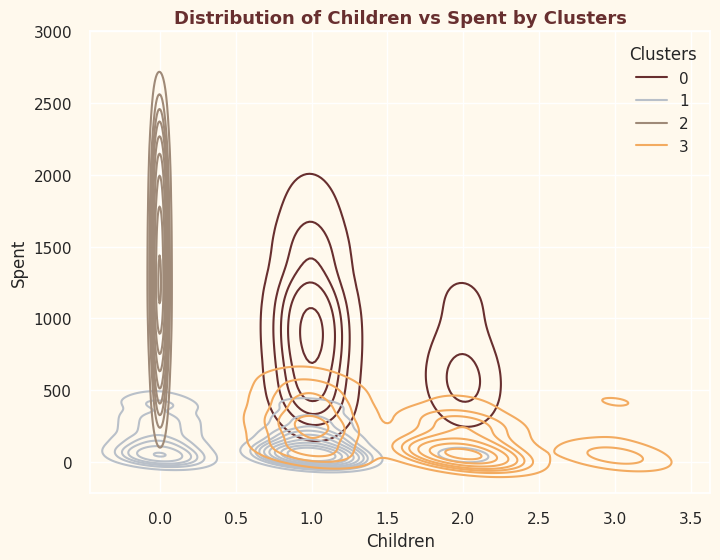

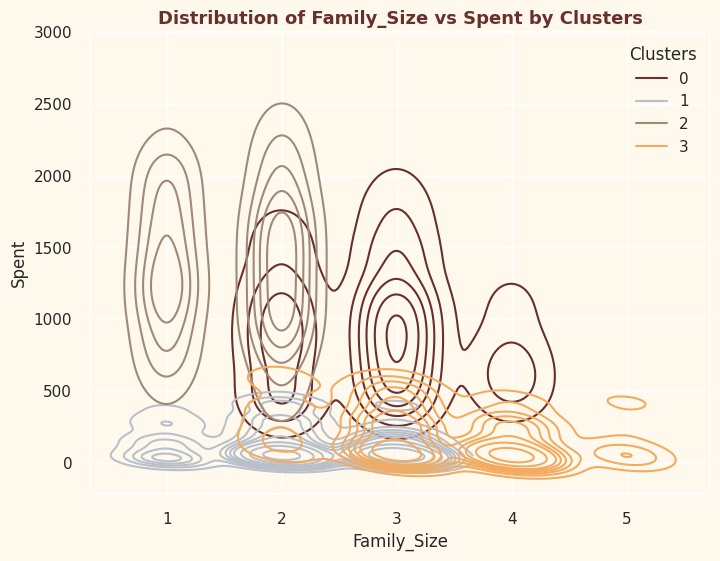

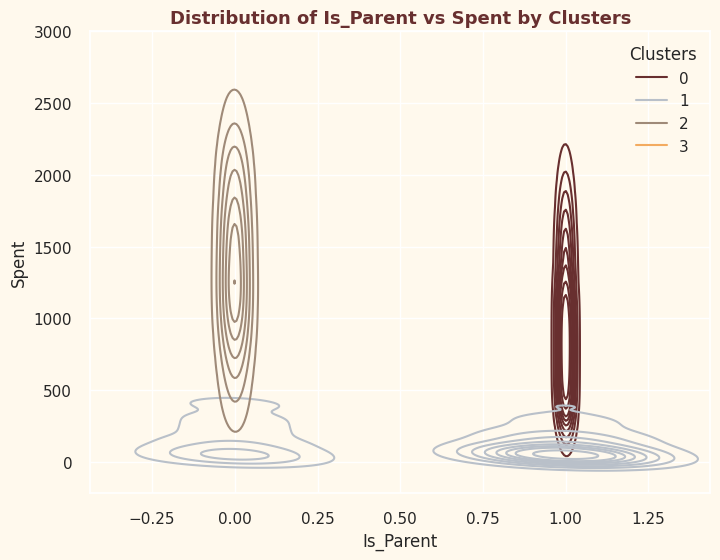

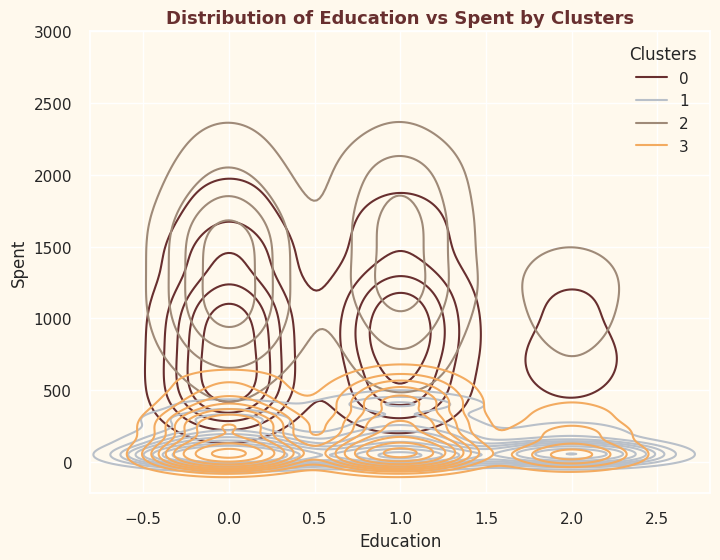

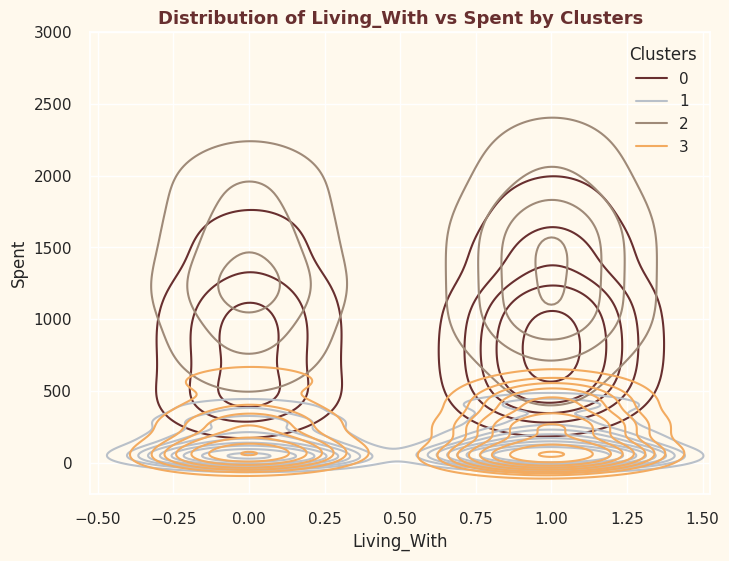

In [ ]:
# Define the personal attributes to plot
Personal = ["Kidhome", "Teenhome", "Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education", "Living_With"]

# Loop to create KDE plots for each feature against 'Spent'
for feature in Personal:
    plt.figure(figsize=(8, 6))

    # Create a KDE plot with contour lines
    sns.kdeplot(data=data, x=feature, y="Spent", hue="Clusters", fill=False, palette=pal)

    plt.title(f'Distribution of {feature} vs Spent by Clusters', fontsize=13, fontweight='bold', color="#682F2F" )
    plt.xlabel(feature)
    plt.ylabel('Spent')
    plt.show()


# **Cluster Statistic**



In [ ]:
# Create a color palette
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(pallet)

# Calculate descriptive statistics grouped by clusters
cluster_stats = data.groupby('Clusters').describe().T

# Display descriptive statistics with a color gradient
styled_cluster_stats = cluster_stats.style.background_gradient(cmap=cmap, axis=1)
display(styled_cluster_stats)


**Resume of the Statictics**




- **Income**: <br>
Category 2 has the highest average income (75,158.40), followed by Category 0 (61,686.30). Category 1 is in third position (45,070.41), while Category 3 has the lowest average (30,196.08).

- **Children at Home**: <br>
Category 1 (0.234) and Category 3 (0.006) have lower average of children at home compared to Category 0 (0.714) and Category 2 (0.740). Category 3 shows the lowest average of children at home (0.006), indicating a small likelihood of having children at home in this cluster.

- **Teenagers at Home**: <br>
Category 3 has the highest average (0.986) in terms of teenagers at home, followed by Category 0 (0.944). Category 1 shows a low average (0.065), while Category 2 has no teenagers at home at all (0.000).

- **Recency**: <br>
The average recency of all categories is quite similar, around 49. Category 3 has the highest average recency (49.69), followed by Category 0 (49.33) and Category 2 (49.12). Category 1 has the lowest average recency (48.02). In general, all four categories show similar behavior in terms of recency.

- **Wine Purchases**: <br>
Category 2 has the highest average (606.73) in terms of wine purchases, followed by Category 3 (104.22). Category 0 shows a lower average (533.17), while Category 1 has the lowest average (33.18). These findings indicate that Category 2 may have a higher tendency to consume wine compared to other categories, while Category 1 shows very low purchasing behavior. This can be considered in marketing strategies to increase sales in Category 1.

- **Fruit Purchases**: <br>
Category 2 has the highest average (64.12) in terms of fruit purchases, followed by Category 0 (35.03). Category 1 shows a much lower average (6.30), while Category 3 has the lowest average (5.79). These findings indicate that Category 2 may have better preferences or access to fruit compared to other categories. Categories 1 and 3, with low purchases, may require more aggressive marketing approaches to increase consumer interest and fruit consumption.

- **Meat Purchases**: <br>
Category 2 has the highest average (464.75) in terms of meat purchases, followed by Category 0 (190.00). Category 3 shows a lower average (34.55), while Category 1 has the lowest average (23.96). These findings indicate that Category 2 has a greater tendency to purchase meat, which could be due to factors such as dietary preferences or income. Category 0, although having lower purchases, also shows good potential. Meanwhile, Categories 1 and 3, with much lower averages, may need more innovative marketing approaches to attract consumers to increase meat purchases.

- **Fish Purchases**: <br>
Category 2 has the highest average (94.53) in fish purchases, followed by Category 0 (48.66). Category 3 shows a much lower average (7.47), while Category 1 has the lowest average (8.74). These findings indicate that Category 2 is most active in purchasing fish, which may be influenced by dietary preferences or awareness of fish health benefits. Category 0 also shows good potential in fish purchases. On the other hand, Categories 1 and 3, with much lower averages, may require promotional strategies or education about fish benefits to increase purchases.

- **Sweet Food Purchases**: <br>
Category 2 has the highest average (65.00) in sweet food purchases, followed by Category 0 (37.33). Category 1 shows a quite low average (6.31), while Category 3 has the lowest average (5.54). These findings indicate that Category 2 is most active in purchasing sweet foods, possibly due to taste preferences or higher consumption habits of sweet products. Category 0 also shows significant purchases, while Categories 1 and 3, with much lower averages, may consider marketing campaigns or attractive product offerings to increase consumer interest.

- **Gold Purchases**: <br>
Category 0 has the highest average (72.54) in gold purchases, followed by Category 2 (75.29). Category 1 shows a lower average (16.57), while Category 3 also has a low average (17.15). These findings indicate that Categories 2 and 0 show greater interest in gold investment, possibly influenced by certain economic or social factors. Categories 1 and 3, with much lower averages, can explore more effective marketing strategies to increase awareness and interest in gold products.

- **Discount Purchases**: <br>
Category 0 has the highest average (3.73) in number of purchases, followed by Category 3 (2.65). Category 1 shows a lower average (1.73), while Category 2 has the lowest average (1.09). These findings indicate that Category 0 is more active in making purchases, possibly due to promotional factors or product preferences. Categories 1 and 2, with low purchase averages, may consider strategies to increase consumer engagement and purchases in these segments.

- **Web Purchases**: <br>
Category 0 has the highest average (6.68) in number of web purchases, followed by Category 2 (5.02). Category 3 shows a lower average (2.85), while Category 1 has the lowest average (2.07). These findings indicate that Categories 0 and 2 are more active in online purchases, possibly due to accessibility or more attractive offers. Meanwhile, Categories 1 and 3, with lower purchase averages, could identify strategies to improve user experience and encourage more purchases through their web platform.

- **Catalog Purchases**: <br>
Category 2 has the highest average (5.84) in number of catalog purchases, followed by Category 0 (3.93). Category 3 shows a lower average (0.93), while Category 1 has the lowest average (0.52). These findings indicate that Category 2 is more active in making purchases from catalogs, which could be due to more attractive products or better accessibility to product information. Category 0 also shows interest, but Categories 1 and 3, with much lower purchase averages, may need more effective strategies to increase catalog purchases.

- **Store Purchases**: <br>
Category 2 has the highest average (8.31) in number of store purchases, followed by Category 0 (8.19). Category 3 shows a lower average (4.10), while Category 1 has the lowest average (3.12). These findings indicate that Categories 2 and 0 tend to be more active in making purchases at physical stores, which may indicate their preference for direct shopping experiences. Categories 3 and 1, with much lower purchase averages, may require better approaches in attracting consumers to make store purchases. This could include more attractive promotions or improved shopping experiences to increase interest in store purchases.

- **Web Visits per Month**: <br>
Category 1 has the highest average (6.74) in number of web visits per month, followed by Category 3 (5.80). Category 0 shows an average (5.57), while Category 2 has the lowest average (2.77). These findings indicate that Categories 1 and 3 are more active in visiting websites, which may reflect higher interest in online offers or available products. Category 0 also shows relatively good visit levels, but Category 2 with low average may indicate lack of interest or awareness of the online platform. Marketing strategies focused on increasing visibility and attracting Category 2's attention can increase their engagement with the website and, ultimately, can increase sales opportunities.

- **Campaign Acceptance**: <br>
Overall, Category 2 appears most responsive to offers compared to other categories, with higher acceptance rates in AcceptedCmp5. Category 0 also shows good acceptance rates, while Categories 1 and 3 show that offers are not attractive to customers in these categories. Marketing strategies can be considered to increase offer attractiveness for Categories 1 and 3, possibly by modifying offers or targeting customers with more specific approaches.

- **Complaints**: <br>
For complaints, it appears that although overall complaint levels are relatively low, there is room for improvement, especially in attracting attention from less active customers, such as in Category 2. With low average complaints across all categories, this indicates that most customers may be satisfied with products and services. However, building better communication channels can help in getting more constructive feedback from all categories, including those less active.

- **Retency**: <br>
Category 0 has the highest average (438.38) in customer duration, followed by Category 2 (356.25). Category 1 shows a slightly lower average (342.65), while Category 3 has the lowest average (279.62) with some customers registered for 0 days. These findings indicate that Categories 0 and 2 are more loyal and stay longer as customers, which may be due to higher satisfaction or engagement. Conversely, Category 3 with low average shows the need for better strategies to retain new customers and increase retention in this category.

- **Age**: <br>
Category 1 has the highest average (37.76) in customer age, followed by Category 3 (49.26). Category 0 shows an average (47.97), while Category 2 has an average (45.94). These findings indicate that Category 3 consists of older customers overall, which may reflect different product preferences or more stable consumption habits. Categories 0 and 2 have relatively similar ages, showing similar potential in marketing products suitable for these age groups. Marketing strategies more focused on these different age segments can help increase engagement and sales.

- **Expenditure**: <br>
Category 2 has the highest average (1370.41) in expenditure, followed by Category 0 (916.73). Category 3 shows an average (174.72), while Category 1 has the lowest average (95.08). These findings indicate that Categories 2 and 0 are more likely to have higher expenditure, possibly reflecting greater interest in products or services offered. Conversely, Categories 1 and 3, with lower average expenditure, may require different marketing approaches to encourage increased spending. Strategies to increase awareness and attract attention to existing offers could be very beneficial for this group.

- **Number of Children**: <br>
Category 0 has the highest average (1.18) in number of children, followed by Category 3 (1.73). Category 1 shows an average (0.78), while Category 2 has the lowest average (0.01). These findings indicate that Categories 0 and 3 tend to have more children, which may impact their product needs and preferences. Meanwhile, Categories 1 and 2, with low average number of children, may show different needs in terms of products or services offered. Creating more relevant and attractive offers for Categories 1 and 2 can increase their engagement and expand the market.

- **Family Size**: <br>
Category 0 has the highest average (2.84) in family size, followed by Category 3 (3.44). Category 1 shows an average (2.39), while Category 2 has the lowest average (1.60). These findings indicate that Categories 0 and 3 tend to have larger family sizes, which may influence spending patterns and product preferences. Category 1 also shows relatively good family size, but Category 2, with lower average, may indicate different lifestyle patterns. Creating offers more suited to the needs and shopping habits of Category 2 can help increase customer engagement and loyalty.

- **Total Promos**: <br>
Category 0 has the highest average (0.32) in total number of promotions, followed by Category 2 (0.74). Category 3 shows a lower average (0.12), while Category 1 has the lowest average (0.09). These findings indicate that Categories 0 and 2 are more frequently involved in promotions, which may reflect effective marketing strategies or greater interest in offers. Meanwhile, Categories 1 and 3 with low averages may indicate lack of utilization of existing promotions. Increasing promotion visibility to Categories 1 and 3 can increase their participation and maximize sales potential.

# **Recommendation**

**Comprehensive Table of Findings and Strategic Recommendations**

| Aspect | Findings | Strategic Recommendations | KPI |
|-------|---------|----------------------|-----|
| **Category 0 - "Active Established Family"** |
| Demographic Profile | • Medium income (€61,686)<br>• Large family (2.84 members)<br>• Average age 47.97 years | • Develop "Family Rewards" program with progressive benefits<br>• Create family product bundling packages<br>• Offer volume discounts for bulk purchases | • 15% basket size increase<br>• 85% retention rate<br>• 40% family program adoption |
| Shopping Behavior | • Active in promotions<br>• High offline purchases<br>• Responsive to discounts | • Implement cross-channel rewards program<br>• Create exclusive shopping hours for members<br>• Develop family referral program | • 25% referral conversion<br>• 30% cross-channel purchase<br>• 40% promotion response rate |
| Channel Preference | • High in store purchases (8.19)<br>• Moderate web visits (5.57)<br>• Active in catalog | • Optimize omnichannel experience<br>• Integrate offline-online rewards<br>• Personalize catalog per family | • 50% omnichannel engagement<br>• 35% catalog response rate |
| **Category 1 - "Young Professional"** |
| Demographic Profile | • Medium income (€45,070)<br>• Youngest age (37.76)<br>• Small family | • Launch "Smart Shopper" program for millennials<br>• Develop subscription model<br>• Offer flexible payment options | • 30% subscription adoption<br>• +25% young member acquisition<br>• 60% digital payment adoption |
| Shopping Behavior | • Low spending (€95.08)<br>• Active on web (6.74 visits)<br>• Small but frequent purchases | • Implement gamification rewards<br>• Create mobile-first shopping experience<br>• Develop micro-reward system | • +40% app engagement<br>• +30% purchase frequency<br>• +25% average order value |
| Channel Preference | • Dominant in digital<br>• Low in catalog<br>• Moderate in store | • Optimize mobile app UX<br>• Implement social commerce<br>• Create digital-first loyalty program | • +35% mobile conversion<br>• +40% social commerce revenue |
| **Category 2 - "Premium Shopper"** |
| Demographic Profile | • Highest income (€75,158)<br>• Small family (1.60)<br>• Mature age (45.94) | • Launch "Premium Club" membership<br>• Create concierge shopping service<br>• Offer exclusive product access | • 45% premium membership adoption<br>• 30% luxury segment growth<br>• +40% customer lifetime value |
| Shopping Behavior | • Highest spending (€1,370)<br>• High premium purchases<br>• Brand loyal | • Develop VIP events program<br>• Create personalized shopping experience<br>• Implement recognition program | • 60% VIP event attendance<br>• 50% premium product adoption<br>• 90% satisfaction score |
| Channel Preference | • Balanced offline-online<br>• Active in premium catalog<br>• Moderate web usage | • Create integrated luxury experience<br>• Develop digital concierge<br>• Personal shopper service | • 40% luxury service adoption<br>• 55% premium channel engagement |
| **Category 3 - "Mature Family"** |
| Demographic Profile | • Lowest income (€30,196)<br>• Largest family (3.44)<br>• Highest age (49.26) | • Develop "Value Family Program"<br>• Create education series<br>• Implement community rewards | • 35% program adoption<br>• 40% community engagement<br>• +30% value perception score |
| Shopping Behavior | • Low spending (€174.72)<br>• Price sensitive<br>• Focus on value | • Implement smart budgeting tools<br>• Create value bundle packages<br>• Develop price alert system | • 40% value bundle adoption<br>• 35% smart shopping tool usage<br>• +20% savings per transaction |
| Channel Preference | • Moderate in all channels<br>• High web visits (5.80)<br>• Low in catalog | • Optimize multi-channel value communication<br>• Create digital saving tools<br>• Implement easy compare feature | • 45% digital tool adoption<br>• +30% value discovery rate |

**Monitoring and Evaluation**

**Main KPIs:**
  1. Customer Lifetime Value (CLV)
  2. Net Promoter Score (NPS)
  3. Customer Satisfaction Score (CSAT)
  4. Channel Engagement Rate
  5. Program Adoption Rate
  6. Average Order Value (AOV)
  7. Purchase Frequency
  8. Retention Rate